# Feature extraction

## Libraries:

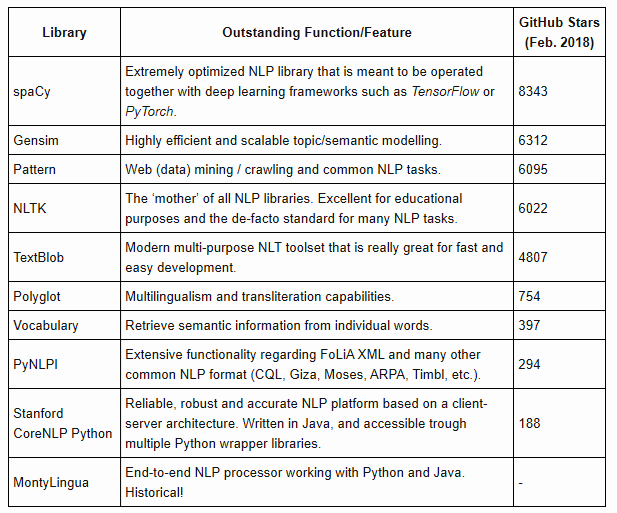<br>
__[nlp-libraries-2018](https://kleiber.me/blog/2018/02/25/top-10-python-nlp-libraries-2018/)__<br>

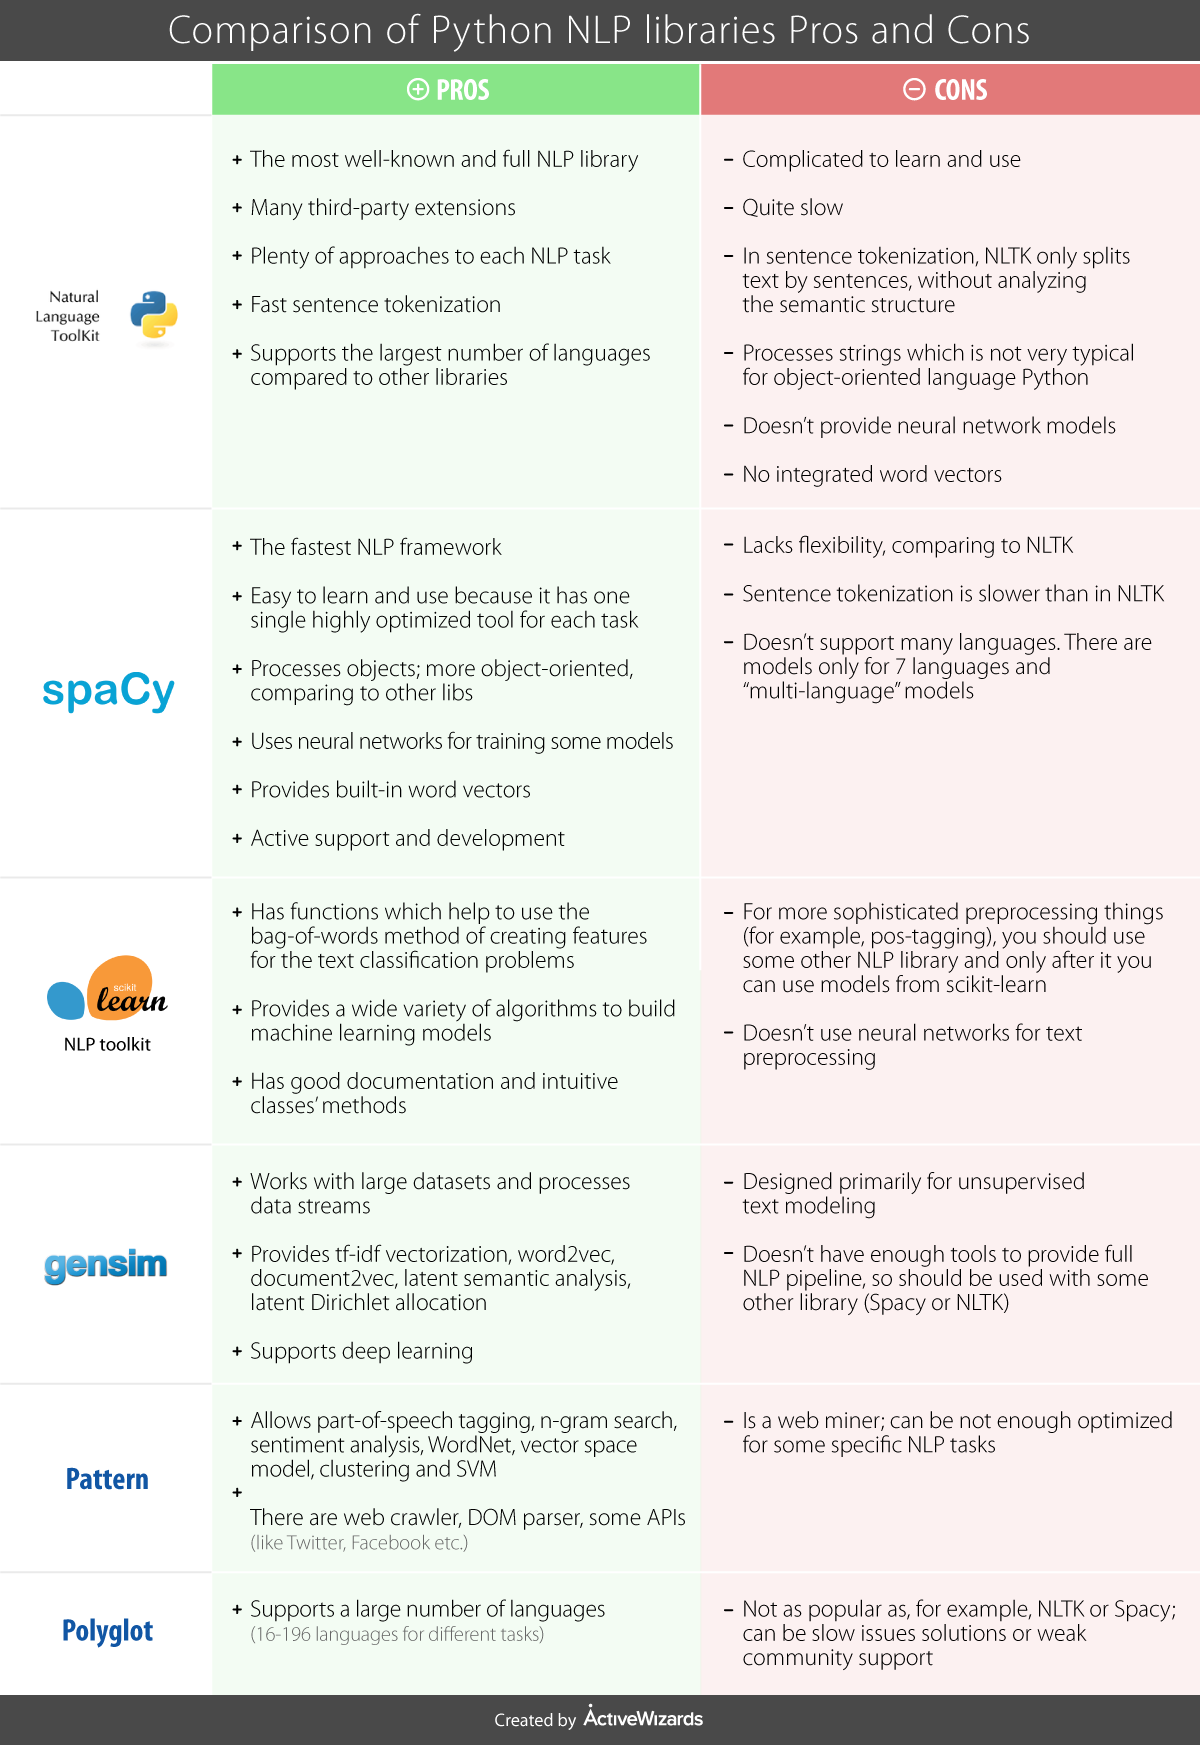<br>
__[nlp-librares_comparison](https://medium.com/activewizards-machine-learning-company/comparison-of-top-6-python-nlp-libraries-c4ce160237eb)__


APIs:

__[NLTK](http://www.nltk.org/)__<br>
__[TextBlob](https://textblob.readthedocs.io/en/dev/)__<br>
__[Spacy](https://spacy.io/)__<br>
__[Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)__<br>
__[Gensim](https://radimrehurek.com/gensim/apiref.html)__<br>


    

## Import:

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#WordNet is a semantically oriented dictionary of English, 
#similar to a traditional thesaurus but with richer structure.
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.collocations import *

from textblob import TextBlob
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer



import spacy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marius\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load data:

In [2]:
df_booksummaries_all = pd.read_table("E:\\Marius\\Documents\\Studium\\Programmieren\\Daten\\booksummaries\\booksummaries\\booksummaries.txt", sep='\t', names=["Wikipedia ID","Freebase ID","Book title","Book author", "Publication date" ,"Genres", "Content"])

In [3]:
df_booksummaries_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 7 columns):
Wikipedia ID        16559 non-null int64
Freebase ID         16559 non-null object
Book title          16559 non-null object
Book author         14177 non-null object
Publication date    10949 non-null object
Genres              12841 non-null object
Content             16559 non-null object
dtypes: int64(1), object(6)
memory usage: 905.6+ KB


In [4]:
content=df_booksummaries_all.Content.head()
type(content)


pandas.core.series.Series

In [5]:
df_booksummaries_all.head()

,Wikipedia ID,Freebase ID,Book title,Book author,Publication date,Genres,Content
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


## Ntlk:
NLTK (www.nltk.org/) is the most common package you will encounter
working with corpora, categorizing text, analyzing linguistic structure, and
more.

### Methods

In [6]:

def tokenize(df_content):
    print('tokenize')
    tokens = df_content.apply(lambda row: nltk.word_tokenize(text=row,preserve_line=True))
    return tokens

def tokenize_sentences(df_content):
    print('tokenize_sentences')
    tokens = df_content.apply(lambda row: nltk.sent_tokenize(row))
    return tokens

def tokenize_re(df_content, pattern):
    print('Regexp_tokenize')
    tokenizer = RegexpTokenizer(pattern)
    tokens = df_content.apply(lambda row: tokenizer.tokenize(row))
    return tokens

def get_synonym(word):
    print("get_synonym")
    synsets = wordnet.synsets(word)
    for s in synsets:
        print("\tLemma: {}".format(s.name()))
        print("\tDefinition: {}".format(s.definition()))
        print("\tExample: {}".format(s.examples()))
    return synsets
    
    
def stemming(serie_tokens):
    print('stemming')
    stemmer = PorterStemmer()
    word_roots =serie_tokens.apply(lambda row: [stemmer.stem(y) for y in row])
    return word_roots

def lemmatize(serie_tokens):
    print("lemmatize")
    lemmatizer = WordNetLemmatizer()
    new_tokens = serie_tokens.apply(lambda row: [lemmatizer.lemmatize(y) for y in row])
    return new_tokens


def tokens_grouped_into_sentences(df_content, pattern):
    print("tokens_grouped_into_sentences")
    sent_tokens = tokenize_sentences(df_content)
    tokens_grouped_into_sentences= [tokenize_re(pd.Series(w), pattern) for w in sent_tokens]
    return pd.Series(tokens_grouped_into_sentences)

    
def multi_word_features():
    print('multi_word_feature')

def lower_case(serie_tokens):
    print("lower_case")
    new_tokens=serie_tokens.apply(lambda row: [w.lower() for w in row])
    return new_tokens

def upper_case(serie_tokens):
    print("upper_case")
    new_tokens=serie_tokens.apply(lambda row: [w.upper() for w in row])
    return new_tokens

def lexical_diversity(serie_tokens):
    diversity = serie_tokens.apply(lambda row: [len(set(row)) / len(row)])
    return diversity

def remove_stopwords(serie_tokens):
    print("remove_stopwords")
    from nltk.corpus import stopwords
    lower_stop_words = set(stopwords.words('english'))
    upper_stop_words= set([word.upper() for word in lower_stop_words])
    new_tokens = serie_tokens.apply(lambda row: [w for w in row if not w in lower_stop_words])
    new_tokens = new_tokens.apply(lambda row: [w for w in row if not w.upper() in upper_stop_words])
    return new_tokens


### Lexical features

#### Tokenize content:
Each Token corresponding to to a word, number or punctuation

In [7]:
tokens=tokenize(content)
tokens

tokenize


0    [Old, Major, ,, the, old, boar, on, the, Manor...
1    [Alex, ,, a, teenager, living, in, near-future...
2    [The, text, of, The, Plague, is, divided, into...
3    [The, argument, of, the, Enquiry, proceeds, by...
4    [The, novel, posits, that, space, around, the,...
Name: Content, dtype: object

In [8]:
sent_tokens=tokenize_sentences(content)
sent_tokens

tokenize_sentences


0    [ Old Major, the old boar on the Manor Farm, c...
1    [ Alex, a teenager living in near-future Engla...
2    [ The text of The Plague is divided into five ...
3    [ The argument of the Enquiry proceeds by a se...
4    [ The novel posits that space around the Milky...
Name: Content, dtype: object

In [9]:
tokens_re=tokenize_re(content, pattern=r'\w+')
tokens_re

Regexp_tokenize


0    [Old, Major, the, old, boar, on, the, Manor, F...
1    [Alex, a, teenager, living, in, near, future, ...
2    [The, text, of, The, Plague, is, divided, into...
3    [The, argument, of, the, Enquiry, proceeds, by...
4    [The, novel, posits, that, space, around, the,...
Name: Content, dtype: object

In [10]:
# sequence of tokens grouped into sentences, with each token corresponding to a word, number, or punctuation mark
tokens_grouped_into_sentences=tokens_grouped_into_sentences(content, r'\w+')
tokens_grouped_into_sentences

tokens_grouped_into_sentences
tokenize_sentences
Regexp_tokenize
Regexp_tokenize
Regexp_tokenize
Regexp_tokenize
Regexp_tokenize


0    0     [Old, Major, the, old, boar, on, the, Ma...
1    0     [Alex, a, teenager, living, in, near, fu...
2    0     [The, text, of, The, Plague, is, divided...
3    0      [The, argument, of, the, Enquiry, proce...
4    0     [The, novel, posits, that, space, around...
dtype: object

#### Stemming:
Stemming means removing affixes from words and
returning the root word (which may not be a real
word).

In [11]:
stemmed_tokens=stemming(tokens)
stemmed_tokens

stemming


0    [old, major, ,, the, old, boar, on, the, manor...
1    [alex, ,, a, teenag, live, in, near-futur, eng...
2    [the, text, of, the, plagu, is, divid, into, f...
3    [the, argument, of, the, enquiri, proce, by, a...
4    [the, novel, posit, that, space, around, the, ...
Name: Content, dtype: object

#### Lemmatization:
Lemmatizing is similar to stemming, but the
difference is that the result of lemmatizing is a real
word.

In [12]:
lemmatized_tokens=lemmatize(tokens)
lemmatized_tokens

lemmatize


0    [Old, Major, ,, the, old, boar, on, the, Manor...
1    [Alex, ,, a, teenager, living, in, near-future...
2    [The, text, of, The, Plague, is, divided, into...
3    [The, argument, of, the, Enquiry, proceeds, by...
4    [The, novel, posit, that, space, around, the, ...
Name: Content, dtype: object

#### Remove stop words:
Most often, lists of stop words that we build or utilize in
software packages include function words, which are words that express
a grammatical relationship (rather than having an intrinsic meaning).
Examples of function words include the, and, for, and of.

In [13]:
tokens_without_stopwords = remove_stopwords(lemmatized_tokens)
tokens_without_stopwords

remove_stopwords


0    [Old, Major, ,, old, boar, Manor, Farm, ,, cal...
1    [Alex, ,, teenager, living, near-future, Engla...
2    [text, Plague, divided, five, parts., town, Or...
3    [argument, Enquiry, proceeds, series, incremen...
4    [novel, posit, space, around, Milky, Way, divi...
Name: Content, dtype: object

#### Vocabulary distribution
The most straightforward approach to represent texts is by
vectors of word frequencies. The vast majority of authorship
attribution studies are (at least partially) based on lexical
features to represent the style. This is also the traditional
bag-of-words text representation followed by researchers in
topic-based text classification (Sebastiani, 2002). That is, the
text is considered as a set of words, each one having a frequency
of occurrence disregarding contextual information.
However, there is a significant difference in style-based text
classification: The most common words (articles, prepositions,
pronouns, etc.) are found to be among the best features
to discriminate between authors (Argamon & Levitan, 2005;
Burrows, 1987). Note that such words are usually excluded
from the feature set of the topic-based text-classification
methods since they do not carry any semantic information,
and they are usually called “function” words. As a consequence,
style-based text classification using lexical features
requires much lower dimensionality in comparison to topicbased
text classification. In other words, much less words are
sufficient to perform authorship attribution (a few hundred
words) in comparison to a thematic text categorization task
(several thousand words). More importantly, function words
are used in a largely unconscious manner by the authors, and
they are topic-independent. Thus, they are able to capture
pure stylistic choices of the authors across different topics.
The selection of the specific function words that will
be used as features is usually based on arbitrary criteria
and requires language-dependent expertise. Various sets of
function words have been used for English, but limited
information was provided about the way that they were
selected: Abbasi and Chen (2005) reported a set of 150 function
words; Argamon, Saric, and Stein (2003) used a set of
303 words; Zhao and Zobel (2005) used a set of 365 function
words; 480 function words were proposed by Koppel and
Schler (2003); another set of 675 words was reported by
Argamon et al. (2007).
A simple and very successful method to define a lexical
feature set for authorship attribution is to extract the most
frequent words found in the available corpus (comprising all
the texts of the candidate authors). Then, a decision has to
be made about the amount of the frequent words that will be
used as features. In the earlier studies, sets of at most 100
frequent words were considered adequate to represent the
style of an author (Burrows, 1987, 1992). Another factor that
affects the feature-set size is the classification algorithm
that will be used since many algorithms overfit the training
data when the dimensionality of the problem increases. However,
the availability of powerful machine learning algorithms
able to deal with thousands of features, such as support vector
machines (SVM; Joachims, 1998), enabled researchers to
increase the feature-set size of this method. Koppel, Schler,
and Bonchek-Dokow (2007) used the 250 most frequent
words while Stamatatos (2006a) extracted the 1,000 most
frequent words. On a larger scale, Madigan et al. (2005) used
all the words that appear at least twice in the corpus. Note
that the first dozens of most frequent words of a corpus are
usually dominated by closed-class words (articles, prepositions,
etc.) After a few hundred words, open-class words
(nouns, adjectives, verbs) are the majority. Hence, when the
dimensionality of this representation method increases, some
content-specificwords also may be included in the feature set.
Despite the availability of a tokenizer, word-based features
may require additional tools for their extraction. This
would involve simple routines such as conversion to lowercase
to more complex tools such as stemmers (Sanderson &
Guenter, 2006), lemmatizers (Gamon, 2004; Tambouratzis
et al., 2004), or detectors of common homographic forms
(Burrows, 2002). Another procedure used by van Halteren
(2007) is to transform words into an abstract form. For
example, the Dutch word “waarmaken” is transformed to
“#L#6+/L/ken,” where the first “L” indicates low frequency,
“6+” indicates the length of the token, the second “L” a
lowercase token, and “ken” are its last three characters.
The bag-of-words approach provides a simple and efficient
solution, but disregards word-order (i.e., contextual)
information. For example, the phrases “take on,” “the second
take” and “take a bath” would just provide three occurrences
of the word “take.” To take advantage of contextual information,
word n-grams (n contiguous words also known as
word collocations) have been proposed as textual features
(Coyotl-Morales, Villaseñor-Pineda, Montes-y-Gómez, &
Rosso, 2006; Peng et al., 2004; Sanderson & Guenter, 2006).

In [16]:
#Vocabulary distribution
fdist1 = nltk.FreqDist(tokens[0])
fdist1

FreqDist({'the': 80, ',': 67, 'and': 34, 'of': 29, 'to': 28, 'animals': 23, 'a': 21, 'Napoleon': 18, '``': 13, "''": 13, ...})

In [19]:
#The most common vocabularies
most_common = fdist1.most_common(50)[0:5]
most_common

[('the', 80), (',', 67), ('and', 34), ('of', 29), ('to', 28)]

In [20]:
#Table
fdist1.tabulate()

            the               ,             and              of              to         animals               a        Napoleon              ``              ''             are            pigs            with             The          animal        Snowball              No           shall            farm             for               .        Squealer            that              in          humans             his              is              as              an               #           Seven    Commandments           equal               '              's              on            Farm              Mr            from              it             All           their             who            more            they           Boxer             but    commandments            legs           Major              he             two            into           which        attempts      themselves            dogs        windmill         changes          harder       windmill.            were         

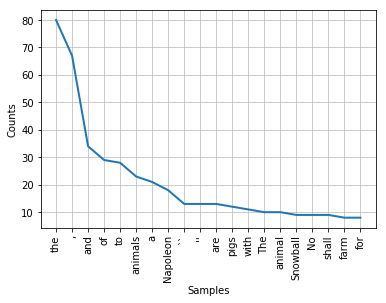

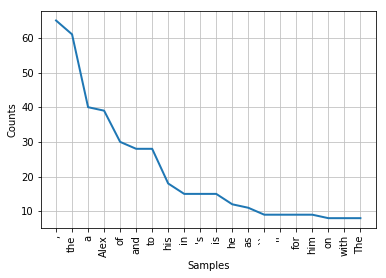

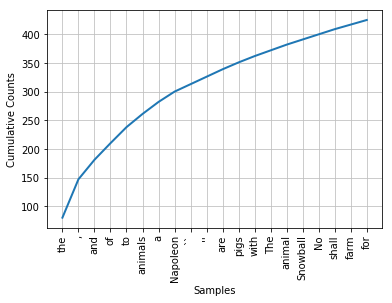

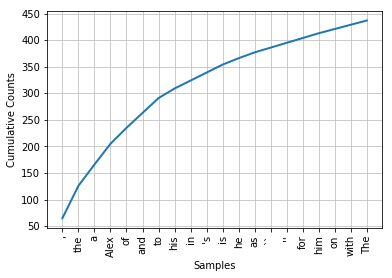

In [21]:
# Plot distribution
fdist2 = nltk.FreqDist(tokens[1])

fdist1.plot(20)
fdist2.plot(20)
fdist1.plot(20, cumulative=True)
fdist2.plot(20, cumulative=True)

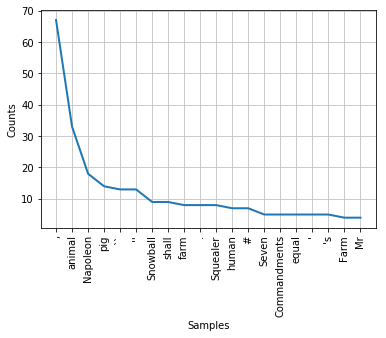

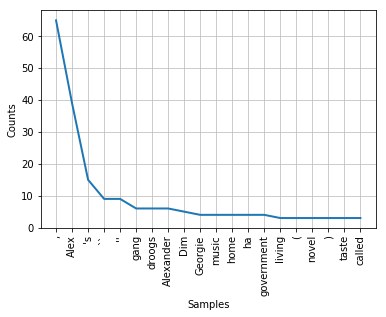

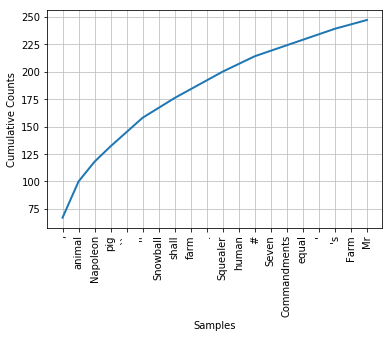

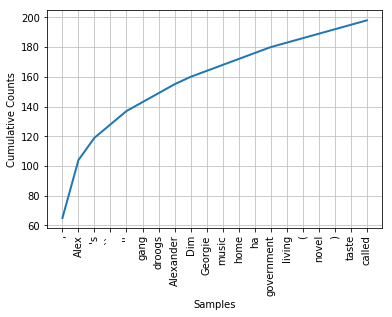

In [22]:
fdist3 = nltk.FreqDist(tokens_without_stopwords[0])
fdist4 = nltk.FreqDist(tokens_without_stopwords[1])

fdist3.plot(20)
fdist4.plot(20)
fdist3.plot(20, cumulative=True)
fdist4.plot(20, cumulative=True)

In [23]:
#Test if samples in fdist1 occur less frequently than in fdist2
fdist1 > fdist2

True

#### Vocabulary diversity
The vocabulary richness functions are attempts to quantify
the diversity of the vocabulary of a text. Typical examples
are the type-token ratio V/N, whereV is the size of the vocabulary
(unique tokens) and N is the total number of tokens of the
text, and the number of hapax legomena (i.e.,words occurring
once) (de Vel, Anderson, Corney, & Mohay, 2001). Unfortunately,
the vocabulary size depends heavily on text length
(as the text length increases, the vocabulary also increases,
quickly at the beginning and then more and more slowly).Various
functions have been proposed to achieve stability over
text length, including K (Yule, 1944), and R (Honore, 1979),
with questionable results (Tweedie & Baayen, 1998). Hence,
such measures are considered unreliable to be used alone.

In [24]:
test=lower_case(tokens)
lexical_diversity(test)

lower_case


0    [0.40630797773654914]
1    [0.46077547339945896]
2     [0.4433497536945813]
3    [0.30181023720349565]
4    [0.45161290322580644]
Name: Content, dtype: object

In [25]:
#Tokens which are used once
haxpaxes=fdist1.hapaxes()
haxpaxes[0:5]

['boar', 'calls', 'meeting', 'where', 'compares']

#### Word/Sentences Length
The very first attempts to attribute authorship were based on simple
measures such as sentence length counts and word length
counts (Mendenhall, 1887). A significant advantage of such
features is that they can be applied to any language and any
corpus with no additional requirements except the availability
of a tokenizer (i.e., a tool to segment text into tokens).

In [26]:
#total number of tokens in text i
total_number=fdist1.N()
print(total_number)
print(len(tokens[0]))

1078
1078


In [27]:
#Filter long words in Text i
long_words = [w for w in lemmatized_tokens[0] if len(w)  > 10]
long_words[0:5]

['revolutionary',
 'philosophy.',
 'irresponsible',
 'Commandments',
 'leadership.']

In [34]:
# words/sentence
number_of_sentences=[len(w) for w in sent_tokens]
number_of_words=[len(w) for w in tokens]
print('Anzahl Token in Text 0:',len(tokens[0]))
print('Anzahl Sätze in Text 0:',number_of_sentences[0])
[len(tokens[w])/len(sent_tokens[w]) for w in range(len(content))]

Anzahl Token in Text 0: 1078
Anzahl Sätze in Text 0: 52


[20.73076923076923,
 26.404761904761905,
 19.9672131147541,
 26.92436974789916,
 26.866666666666667]

In [37]:
print('Total number of sentences:',pd.Series(number_of_sentences).sum())
print('Total number of words:',pd.Series(number_of_words).sum())
print(pd.Series(number_of_words).sum())

Total number of sentences: 304
Total number of words: 7415
7415


#### Errors
From another point of view, Koppel and Schler (2003)
proposed various writing error measures to capture the
idiosyncrasies of an author’s style. To that end, they defined
a set of spelling errors (e.g., letter omissions and insertions)
and formatting errors (e.g., “all caps” words) and proposed a
methodology to extract such measures automatically using
a spell checker. Interestingly, human experts mainly use
similar observations to attribute authorship; however, the
availability of accurate spell checkers is still problematic for
many natural languages.

In [38]:
#errors

#### Word n-grams:
To take advantage of contextual information,
word n-grams (n contiguous words also known as
word collocations) have been proposed as textual features
(Coyotl-Morales, Villaseñor-Pineda, Montes-y-Gómez, &
Rosso, 2006; Peng et al., 2004; Sanderson & Guenter, 2006).
However, the classification accuracy achieved by word ngrams
is not always better than individual word features
(Coyotl-Morales et al., 2006; Sanderson & Guenter, 2006).
The dimensionality of the problem following this approach
increases considerably with n to account for all the possible
combinations between words. Moreover, the representation
produced by this approach is very sparse since most of the
word combinations are not encountered in a given (especially
short) text, making it very difficult to be handled effectively
by a classification algorithm. Another problem with word
n-grams is that it is quite possible to capture content-specific
information rather than stylistic information (Gamon, 2004).

In [63]:
#word_n_grams in Text 0
from nltk import ngrams
n = 2
n_grams = ngrams(tokens[0], n)
for grams in n_grams:
    print(grams)

('Old', 'Major')
('Major', ',')
(',', 'the')
('the', 'old')
('old', 'boar')
('boar', 'on')
('on', 'the')
('the', 'Manor')
('Manor', 'Farm')
('Farm', ',')
(',', 'calls')
('calls', 'the')
('the', 'animals')
('animals', 'on')
('on', 'the')
('the', 'farm')
('farm', 'for')
('for', 'a')
('a', 'meeting')
('meeting', ',')
(',', 'where')
('where', 'he')
('he', 'compares')
('compares', 'the')
('the', 'humans')
('humans', 'to')
('to', 'parasites')
('parasites', 'and')
('and', 'teaches')
('teaches', 'the')
('the', 'animals')
('animals', 'a')
('a', 'revolutionary')
('revolutionary', 'song')
('song', ',')
(',', "'Beasts")
("'Beasts", 'of')
('of', "England'.")
("England'.", 'When')
('When', 'Major')
('Major', 'dies')
('dies', ',')
(',', 'two')
('two', 'young')
('young', 'pigs')
('pigs', ',')
(',', 'Snowball')
('Snowball', 'and')
('and', 'Napoleon')
('Napoleon', ',')
(',', 'assume')
('assume', 'command')
('command', 'and')
('and', 'turn')
('turn', 'his')
('his', 'dream')
('dream', 'into')
('into', 'a'

('drink', 'alcohol')
('alcohol', "''")
("''", 'having')
('having', '``')
('``', 'to')
('to', 'excess')
('excess', "''")
("''", 'appended')
('appended', 'to')
('to', 'it')
('it', 'and')
('and', '``')
('``', 'No')
('No', 'animal')
('animal', 'shall')
('shall', 'sleep')
('sleep', 'in')
('in', 'a')
('a', 'bed')
('bed', "''")
("''", 'with')
('with', '``')
('``', 'with')
('with', 'sheets')
('sheets', "''")
("''", 'added')
('added', 'to')
('to', 'it')
('it', ')')
(')', '.')
('.', 'The')
('The', 'changed')
('changed', 'commandments')
('commandments', 'are')
('are', 'as')
('as', 'follows')
('follows', ',')
(',', 'with')
('with', 'the')
('the', 'changes')
('changes', 'bolded')
('bolded', ':')
(':', '*')
('*', '4')
('4', 'No')
('No', 'animal')
('animal', 'shall')
('shall', 'sleep')
('sleep', 'in')
('in', 'a')
('a', 'bed')
('bed', 'with')
('with', 'sheets.')
('sheets.', '*')
('*', '5')
('5', 'No')
('No', 'animal')
('animal', 'shall')
('shall', 'drink')
('drink', 'alcohol')
('alcohol', 'to')
('to',

In [62]:
from nltk.collocations import *
print(type(n_grams[0]))
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(n_grams)
finder.nbest(bigram_measures.pmi, 10)


TypeError: 'generator' object is not subscriptable

### Character:
According to this family of measures, a text is viewed as
a mere sequence of characters. That way, various characterlevel
measures can be defined, including alphabetic characters
count, digit characters count, uppercase and lowercase
characters count, letter frequencies, punctuation marks count,
and so on. (de Vel et al., 2001; Zheng et al., 2006). This type
of information is easily available for any natural language and
corpus, and it has been proven to be quite useful to quantify
the writing style (Grieve, 2007).

#### Character types

#### Character n-grams (fixed length):
A more elaborate, although still computationally simplistic,
approach is to extract frequencies of n-grams on
the character level. For instance, the character 4-grams
of the beginning of this paragraphwould be:1 |A_mo|, |_mor|,
|more|, |ore_|, |re_e|, and so on. This approach is able to
capture nuances of style, including lexical information (e.g.,
|_in_|, |text|), hints of contextual information (e.g., |in_t|),
use of punctuation and capitalization, and so on. Another
advantage of this representation is its ability to be tolerant to
noise. In cases where the texts in question are noisy, containing
grammatical errors or making strange use of punctuation,
as it usually happens in e-mail or in online forum messages,
the character n-gram representation is not affected dramatically.
For example, the words “simplistic” and “simpilstc”
would produce many common character trigrams. On the
other hand, these two words would be considered different
in a lexically based representation. Note that in style-based
text categorization, such errors could be considered personal
traits of the author (Koppel&Schler, 2003). This information
also is captured by character n-grams (e.g., in the uncommon
trigrams |stc| and |tc_|). Finally, for oriental languages
where the tokenization procedure is quite hard, character
n-grams offer a suitable solution (Matsuura&Kanada, 2000).
As can be seen in Table 1, the computational requirements of
character n-gram features are minimal.
Note that as with words, the most frequent character
n-grams are the most important features for stylistic purposes.
The procedure of extracting the most frequent n-grams is
language-independent and requires no special tools; however,
the dimensionality of this representation is considerably
increased in comparison to the word-based approach
(Stamatatos, 2006a, 2006b). This happens because character
n-grams capture redundant information (e.g., |and_|, |_and|),
and many character n-grams are needed to represent a single
long word. 


In [66]:
#Text 0: char-n-grams
n_char = 2
n_grams_char = ngrams(content[0], n_char)
for grams in n_grams_char:
    print(grams)

(' ', 'O')
('O', 'l')
('l', 'd')
('d', ' ')
(' ', 'M')
('M', 'a')
('a', 'j')
('j', 'o')
('o', 'r')
('r', ',')
(',', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'o')
('o', 'l')
('l', 'd')
('d', ' ')
(' ', 'b')
('b', 'o')
('o', 'a')
('a', 'r')
('r', ' ')
(' ', 'o')
('o', 'n')
('n', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'M')
('M', 'a')
('a', 'n')
('n', 'o')
('o', 'r')
('r', ' ')
(' ', 'F')
('F', 'a')
('a', 'r')
('r', 'm')
('m', ',')
(',', ' ')
(' ', 'c')
('c', 'a')
('a', 'l')
('l', 'l')
('l', 's')
('s', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'a')
('a', 'n')
('n', 'i')
('i', 'm')
('m', 'a')
('a', 'l')
('l', 's')
('s', ' ')
(' ', 'o')
('o', 'n')
('n', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'f')
('f', 'a')
('a', 'r')
('r', 'm')
('m', ' ')
(' ', 'f')
('f', 'o')
('o', 'r')
('r', ' ')
(' ', 'a')
('a', ' ')
(' ', 'm')
('m', 'e')
('e', 'e')
('e', 't')
('t', 'i')
('i', 'n')
('n', 'g')
('g', ',')
(',', ' ')
(' ', 'w')
('w', 'h')
('h', 'e')

('u', 'g')
('g', 'g')
('g', 'e')
('e', 's')
('s', 't')
('t', 's')
('s', ' ')
(' ', 't')
('t', 'h')
('h', 'a')
('a', 't')
('t', ' ')
(' ', 'i')
('i', 't')
('t', 's')
('s', ' ')
(' ', 'w')
('w', 'a')
('a', 'l')
('l', 'l')
('l', 's')
('s', ' ')
(' ', 'w')
('w', 'e')
('e', 'r')
('r', 'e')
('e', ' ')
(' ', 't')
('t', 'o')
('o', 'o')
('o', ' ')
(' ', 't')
('t', 'h')
('h', 'i')
('i', 'n')
('n', '.')
('.', ' ')
(' ', 'O')
('O', 'n')
('n', 'c')
('c', 'e')
('e', ' ')
(' ', 'S')
('S', 'n')
('n', 'o')
('o', 'w')
('w', 'b')
('b', 'a')
('a', 'l')
('l', 'l')
('l', ' ')
(' ', 'b')
('b', 'e')
('e', 'c')
('c', 'o')
('o', 'm')
('m', 'e')
('e', 's')
('s', ' ')
(' ', 'a')
('a', ' ')
(' ', 's')
('s', 'c')
('c', 'a')
('a', 'p')
('p', 'e')
('e', 'g')
('g', 'o')
('o', 'a')
('a', 't')
('t', ',')
(',', ' ')
(' ', 'N')
('N', 'a')
('a', 'p')
('p', 'o')
('o', 'l')
('l', 'e')
('e', 'o')
('o', 'n')
('n', ' ')
(' ', 'b')
('b', 'e')
('e', 'g')
('g', 'i')
('i', 'n')
('n', 's')
('s', ' ')
(' ', 'p')
('p', 'u')
('u', 'r')

('i', 't')
('t', 'a')
('a', 'l')
('l', ' ')
(' ', 'a')
('a', 'n')
('n', 'd')
('d', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'w')
('w', 'r')
('r', 'i')
('i', 't')
('t', 'i')
('i', 'n')
('n', 'g')
('g', ' ')
(' ', 'f')
('f', 'r')
('r', 'o')
('o', 'm')
('m', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'p')
('p', 'r')
('r', 'e')
('e', 'v')
('v', 'i')
('i', 'o')
('o', 'u')
('u', 's')
('s', ' ')
(' ', 'o')
('o', 'w')
('w', 'n')
('n', 'e')
('e', 'r')
('r', ' ')
(' ', 'h')
('h', 'a')
('a', 'd')
('d', ' ')
(' ', 'n')
('n', 'o')
('o', 't')
('t', ' ')
(' ', 'b')
('b', 'e')
('e', 'e')
('e', 'n')
('n', ' ')
(' ', 'r')
('r', 'e')
('e', 'p')
('p', 'a')
('a', 'i')
('i', 'n')
('n', 't')
('t', 'e')
('e', 'd')
('d', '.')
('.', ' ')
(' ', 'H')
('H', 'e')
('e', ' ')
(' ', 'r')
('r', 'e')
('e', 'c')
('c', 'o')
('o', 'u')
('u', 'n')
('n', 't')
('t', 's')
('s', ' ')
(' ', 'a')
('a', ' ')
(' ', 't')
('t', 'a')
('a', 'l')
('l', 'e')
('e', ' ')
(' ', 'o')
('o', 'f')
('f', ' ')
(' ', 'B')

(' ', 'w')
('w', 'i')
('i', 't')
('t', 'h')
('h', ' ')
(' ', 's')
('s', 'h')
('h', 'e')
('e', 'e')
('e', 't')
('t', 's')
('s', '.')
('.', ' ')
(' ', '*')
('*', ' ')
(' ', '5')
('5', ' ')
(' ', 'N')
('N', 'o')
('o', ' ')
(' ', 'a')
('a', 'n')
('n', 'i')
('i', 'm')
('m', 'a')
('a', 'l')
('l', ' ')
(' ', 's')
('s', 'h')
('h', 'a')
('a', 'l')
('l', 'l')
('l', ' ')
(' ', 'd')
('d', 'r')
('r', 'i')
('i', 'n')
('n', 'k')
('k', ' ')
(' ', 'a')
('a', 'l')
('l', 'c')
('c', 'o')
('o', 'h')
('h', 'o')
('o', 'l')
('l', ' ')
(' ', 't')
('t', 'o')
('o', ' ')
(' ', 'e')
('e', 'x')
('x', 'c')
('c', 'e')
('e', 's')
('s', 's')
('s', '.')
('.', ' ')
(' ', '*')
('*', ' ')
(' ', '6')
('6', ' ')
(' ', 'N')
('N', 'o')
('o', ' ')
(' ', 'a')
('a', 'n')
('n', 'i')
('i', 'm')
('m', 'a')
('a', 'l')
('l', ' ')
(' ', 's')
('s', 'h')
('h', 'a')
('a', 'l')
('l', 'l')
('l', ' ')
(' ', 'k')
('k', 'i')
('i', 'l')
('l', 'l')
('l', ' ')
(' ', 'a')
('a', 'n')
('n', 'y')
('y', ' ')
(' ', 'o')
('o', 't')
('t', 'h')
('h', 'e')

In [73]:
#compute frequency distribution for all the char-bigrams in the text
nltk.collocations.BigramCollocationFinder._ngram_freqdist(content[0], 2)

FreqDist({('e', ' '): 162, (' ', 'a'): 159, (' ', 't'): 154, ('s', ' '): 144, ('t', 'h'): 137, ('h', 'e'): 129, ('a', 'n'): 127, ('a', 'l'): 99, ('i', 'n'): 88, ('n', ' '): 71, ...})

#### Character n-grams (variable length):
An important issue of the character n-gram approach is
the definition of n; that is, how long the strings should
be. A large n would better capture lexical and contextual
information, but it also would better capture thematic information.
Furthermore, a large n would increase substantially
the dimensionality of the representation (producing hundreds
of thousands of features). On the other hand, a small n (i.e.,
2 or 3) would be able to represent subword (syllable-like)
information, but it would not be adequate for representing
the contextual information. Note that the selection of the best
n value is a language-dependent procedure since certain natural
languages (e.g., Greek, German) tend to have longwords
in comparison to English. Therefore, probably a larger n value
would be more appropriate for such languages in comparison
to the optimal n value for English. The problem of defining a
fixed value for n can be avoided by the extraction of n-grams
of variable length

#### Compression methods:
A quite particular case of using character information is
the compression-based approaches (Benedetto, Caglioti, &
Loreto, 2002; Khmelev & Teahan, 2003a; Marton et al.,
2005). The main idea is to use the compression model
acquired from one text to compress another text, usually
based on off-the-shelf compression programs. If the two texts
are written by the same author, the resulting bit-wise size of
the compressed file will be relatively low. Such methods do
not require a concrete representation of text, and the classification
algorithm incorporates the quantification of textual
properties. However, the compression models that describe
the characteristics of the texts are usually based on repetitions
of character sequences, and as a result, they can capture
subword and contextual information. In that sense, they can
be considered as character-based methods.

### Semantik:


#### Synonyms and definition:

In [74]:
#Synonyms
word="tests"
synonyms=get_synonym(word) 

get_synonym
	Lemma: trial.n.02
	Definition: trying something to find out about it
	Example: ['a sample for ten days free trial', 'a trial of progesterone failed to relieve the pain']
	Lemma: test.n.02
	Definition: any standardized procedure for measuring sensitivity or memory or intelligence or aptitude or personality etc
	Example: ['the test was standardized on a large sample of students']
	Lemma: examination.n.02
	Definition: a set of questions or exercises evaluating skill or knowledge
	Example: ['when the test was stolen the professor had to make a new set of questions']
	Lemma: test.n.04
	Definition: the act of undergoing testing
	Example: ['he survived the great test of battle', 'candidates must compete in a trial of skill']
	Lemma: test.n.05
	Definition: the act of testing something
	Example: ['in the experimental trials the amount of carbon was measured separately', 'he called each flip of the coin a new trial']
	Lemma: test.n.06
	Definition: a hard outer covering as of some am

#### Semantic dependencies

### Syntactic

#### Chunks

#### Sentence and phrase structure

#### Errors

#### part-of-speech tagging

In [ ]:
 
tagged = nltk.pos_tag(tokens[0])
tagged[0:5]

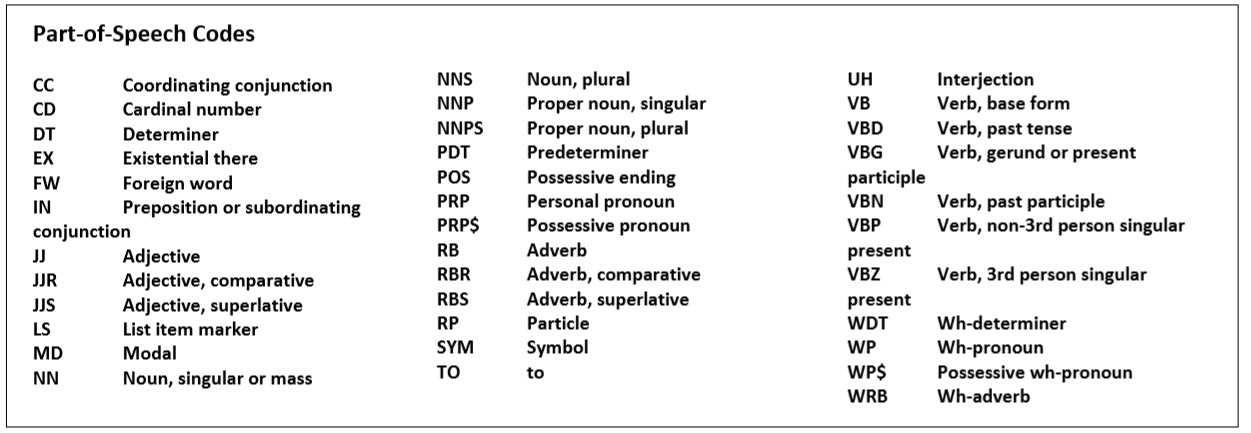

In [ ]:
 nltk.help.upenn_tagset('NN.*')

In [ ]:
#Entities
nltk.download('maxent_ne_chunker')
nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities[0:5]


In [ ]:
from nltk.corpus import treebank
nltk.download('treebank')
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

In [ ]:
#Rewrite rule frequencies


## Methods from scikit-learn library

### Methods:

In [ ]:
#Convert a collection of text documents to a matrix of token counts
def n_grams(text, range, analyzer):
    c = CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents='unicode', lowercase=True, preprocessor=None, tokenizer=None, stop_words='english', token_pattern='\w+', ngram_range=range, analyzer=analyzer, max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False)
    occurences = c.fit_transform(text).todense()
    names=c.get_feature_names()
    return occurences, names    
    
#Transform a count matrix to a normalized tf or tf-idf representation
def count_matrix_to_tfidf(count_matrix):
    c=TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
    array = c.fit_transform(count_matrix)
    return array
    
#Convert a collection of raw documents to a matrix of TF-IDF features
def raw_text_to_tfidf(df_content):
    print()

### n_grams:

In [ ]:
vectors,names=n_grams(content,(1,1),'word')
print(content[0:5])
print(vectors[0:5])
print(vectors.shape)
print(names[0:5])

In [ ]:
vectors_n_word,names_n_word=n_grams(content,(2,2),'word')
print(content)
print(vectors_n_word)
print(vectors_n_word.shape)
print(names_n_word)

In [ ]:
vectors_n_char,names_n_char=n_grams(content,(2,2),'char')
print(content[0:5])
print(vectors_n_char[0:5])
print(vectors_n_char.shape)
print(names_n_char[0:5])

In [ ]:
vectors_n_char_wb,names_n_char_wb=n_grams(content,(2,2),'char_wb')
print(content[0:5])
print(vectors_n_char_wb[0:5])
print(vectors_n_char_wb.shape)
print(names_n_char_wb[0:5])

###  TFIDF

In [ ]:
vectors_tfidf=count_matrix_to_tfidf(vectors)
print(vectors_tfidf.shape)
for v in vectors_tfidf[0:5,0:5]:
    print(v)

## Methods from TextBlob:
TextBlob (http://textblob.readthedocs.io/en/dev/index.html) is
a Python library for processing textual data. It provides a simple API for
diving deep into common NLP tasks, such as part-of-speech tagging, noun
phrase extraction, sentiment analysis, classification, and much more. You
can use it for sentiment analysis. Sentiment refers to a feeling hidden in the
sentence. Polarity defines negativity or positivity in the sentence, whereas
subjectivity implies whether the sentence discusses something vaguely or
with complete surety.

In [ ]:
def get_sentiment(df_content):
    sentiments=df_content.apply(lambda row: TextBlob(row).sentiment)
    return sentiments

def get_tags(df_content):
    tags=df_content.apply(lambda row: TextBlob(row).tags)
    return tags

def translate(df_content, lang_s='en', lang_d='de'):
    translation=df_content.apply(lambda row: str(TextBlob(row.strip()).translate(from_lang=lang_s, to=lang_d)))
    return translation
    
def correct(df_content):
    corr=df_content.apply(lambda row: str(TextBlob(row.strip()).correct()))
    return corr

### Sentiment:
Sentiment refers to a feeling hidden in the
sentence. Polarity defines negativity or positivity in the sentence, whereas
subjectivity implies whether the sentence discusses something vaguely or
with complete surety.

In [ ]:
sentiment=get_sentiment(content)
sentiment

### Tags: 
Tagging is the process of denoting a word in a text (corpus) as corresponding to a particular part of speech.


In [ ]:
tags=get_tags(content)
tags

### Correction

In [ ]:
corr=correct(content)
corr

### Translation

In [ ]:
translation=translate(content)
translation

## Methods from SpaCy:
SpaCy (https://spacy.io/) provides very fast and accurate syntactic
analysis (the fastest of any library released) and also offers named entity
recognition and ready access to word vectors. It is written in Cython
language and contains a wide variety of trained models on language
vocabularies, syntaxes, word-to-vector transformations, and entities
recognition.

In [ ]:
def get_entities(df_content):
    nlp = spacy.load("en")
    entities=df_contentapply(lambda row: nlp(row).ents)
    return entities

### Entities

In [ ]:
#entities=get_entities(content)
#entities